<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding:20px;">

**Overall Summary of the Project Iter 2**
    
Approved. Great job!

<div style="border:solid blue 2px; padding:20px;">

# Project Review for Edgardo

**Overall Summary of the Project**

Dear Edgardo,

Thank you for submitting your project titled "Identifying the Optimal Location for Developing a New Oil Well for OilyGiant Mining Company." Your comprehensive approach—including data exploration, model training, profit calculation, and risk assessment—demonstrates a solid understanding of the project objectives. Below is a detailed review highlighting your strengths, optional areas for improvement, and confirmation that your project meets the approval criteria.

---

✅ Strengths

- **Data Loading and Preparation:**
  - Successfully imported and handled all three datasets (`geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`).
  - Conducted thorough data exploration by checking for missing values, duplicates, and analyzing statistical characteristics.
  - Implemented functions to generate histograms and descriptive statistics, facilitating a deep understanding of data distributions.

- **Separate Region Analysis:**
  - Appropriately handled each region independently by training separate Linear Regression models for `geo_data_0`, `geo_data_1`, and `geo_data_2`.
  - Ensured that data splitting (75% training, 25% validation) was performed separately for each region, maintaining the integrity of region-specific analyses.

- **Model Training and Evaluation:**
  - Utilized Linear Regression as specified, training distinct models for each region.
  - Calculated both RMSE and R² scores for each model, providing clear metrics to evaluate performance.
  - Identified varying model performances across regions, with Region 1 showing exceptional results due to its limited target range.

- **Profit Calculation:**
  - Defined key financial parameters, including total budget, revenue per unit, and budget per well.
  - Accurately calculated the break-even reserve volume required per well to avoid losses.
  - Selected the top 200 wells per region based on predicted reserves, aligning with project requirements.

- **Risk and Bootstrapping:**
  - Implemented bootstrapping techniques to estimate average profits, confidence intervals, and assess the risk of financial losses.
  - Analyzed bootstrapped profit distributions, providing a robust understanding of potential financial outcomes and associated risks.

- **Clear Documentation and Visualization:**
  - Included descriptive markdown cells that effectively explain each step of the analysis, enhancing readability and comprehension.
  - Utilized visualizations (histograms) to illustrate data distributions and bootstrapped profit outcomes, aiding in the interpretation of results.

⚠️ Optional Areas for Improvement

- **Enhanced Visualizations:**
  - **Scatter Plots:** Incorporate scatter plots of predicted vs. actual reserves for each region to visually assess model performance and identify any patterns or anomalies.
  - **Residual Plots:** Add residual plots to evaluate the distribution of prediction errors, which can help in diagnosing model issues or validating assumptions.

- **Model Evaluation:**
  - **Additional Metrics:** Consider calculating Mean Absolute Error (MAE) or Adjusted R² alongside RMSE and R² to provide a more comprehensive assessment of model performance.
  - **Model Diagnostics:** Explore potential reasons for the perfect R² in Region 1, such as data leakage or overfitting, and consider techniques to address these issues if necessary.

- **Code Modularity:**
  - **Reusable Functions:** Refactor repetitive code segments into reusable functions. For example, creating a function for training models and selecting top wells can improve code maintainability and readability.

- **Bootstrapping Enhancements:**
  - **Confidence Interval Visualization:** Clearly visualize confidence intervals using error bars or shaded regions in the profit distribution histograms.
  - **Risk Threshold Analysis:** Explore varying risk thresholds to understand how different levels of acceptable risk impact region selection.

🟢 Changes that must be done for approval
    
- Minor fixes and conclusions that must be added, please look for red boxes in the code ;)

**Waiting for changes in order for me to approve ;)**

**Congratulations on your excellent work!** Your analytical rigor and adherence to project requirements are commendable. Keep up the great effort in your future projects.

---

**Best Regards**

</div>

The goal of this project is to assist the OilyGiant mining company in determining the most profitable location for the development of a new oil well. By analyzing geological data from three potential regions, we aim to build predictive models that estimate the volume of oil reserves in each well. These models will enable us to identify the top-performing wells and assess the financial viability of each region. Using economic constraints, such as the budget, cost per well, and revenue per barrel, we will calculate the profit potential for each region while factoring in risks through Bootstrapping techniques. The final recommendation will identify the region with the highest average profit and acceptable risk of losses, providing OilyGiant with a data-driven decision for their investment. This analysis ensures that the company maximizes returns while minimizing financial risks in their operations.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Great introduction :)
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

print(data_0.head())
print(data_1.head())
print(data_2.head())


      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [3]:
# Load datasets
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Display basic info and first few rows for each dataset
print("Region 0 - Data Info:")
print(data_0.info())
print(data_0.head(), "\n")

print("Region 1 - Data Info:")
print(data_1.info())
print(data_1.head(), "\n")

print("Region 2 - Data Info:")
print(data_2.info())
print(data_2.head(), "\n")



Region 0 - Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Region 1 - Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 n

Region 0 - Number of Duplicates: 0
Region 0 - No Duplicates Found.

Region 1 - Number of Duplicates: 0
Region 1 - No Duplicates Found.

Region 2 - Number of Duplicates: 0
Region 2 - No Duplicates Found.

Region 0 - Feature Distributions:


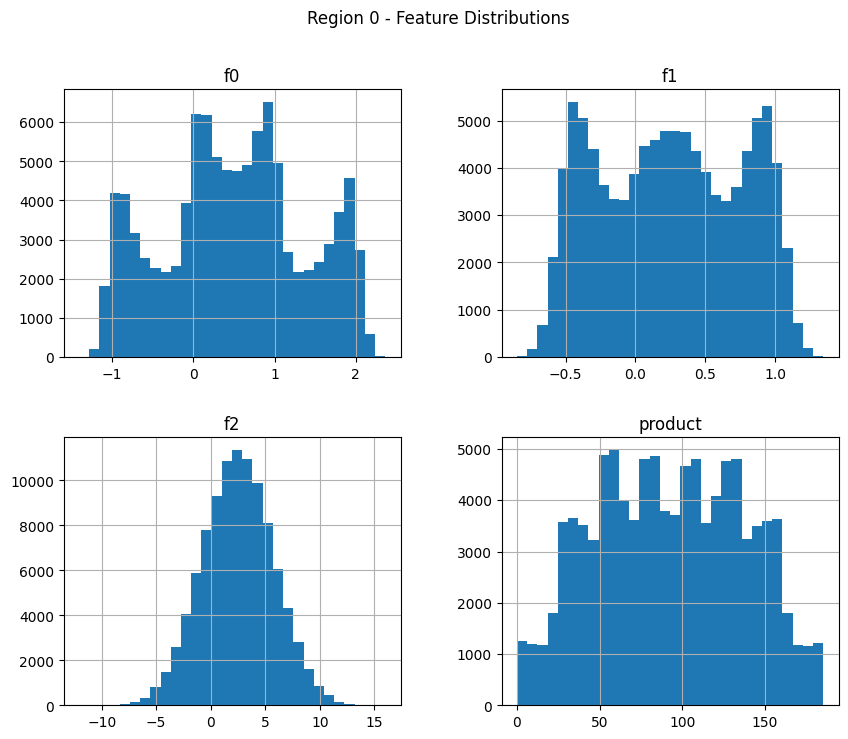

Region 1 - Feature Distributions:


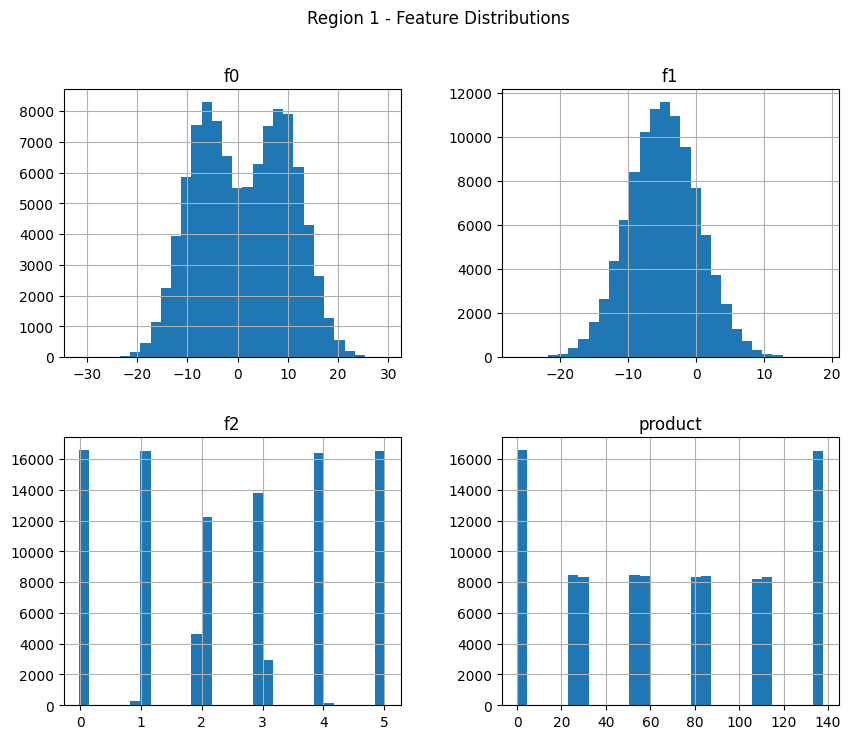

Region 2 - Feature Distributions:


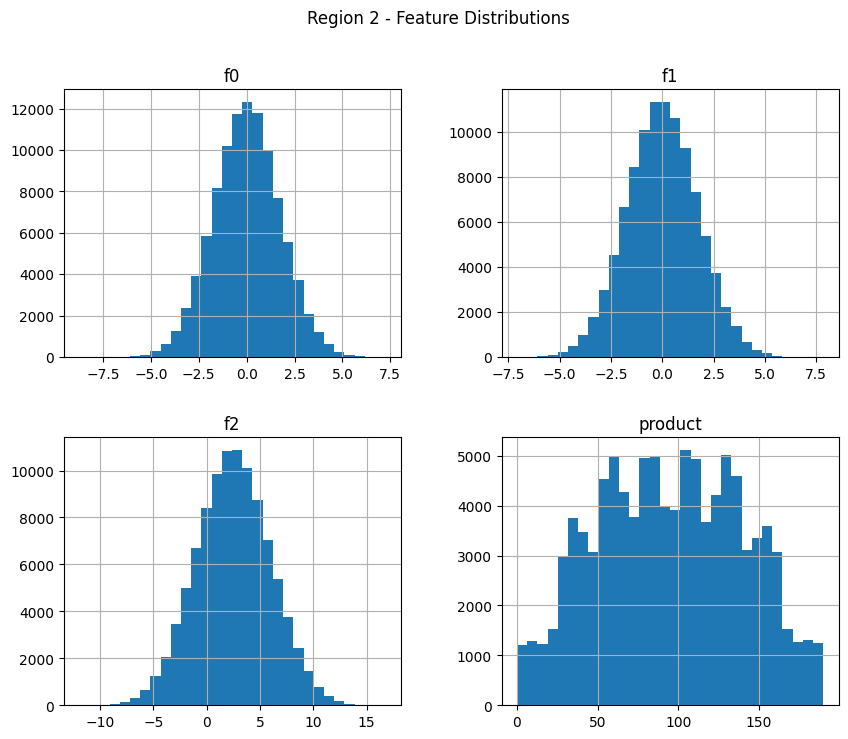

Region 0 - Statistical Description:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

Region 1 - Statistical Description:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%

In [4]:
# Check for duplicates
for i, data in enumerate([data_0, data_1, data_2]):
    duplicates = data.duplicated().sum()
    print(f"Region {i} - Number of Duplicates: {duplicates}")
    if duplicates > 0:
        print(f"Region {i} - Duplicates Found. Please investigate further.\n")
    else:
        print(f"Region {i} - No Duplicates Found.\n")

# Analyze feature distributions
for i, data in enumerate([data_0, data_1, data_2]):
    print(f"Region {i} - Feature Distributions:")
    data.hist(bins=30, figsize=(10, 8))
    plt.suptitle(f"Region {i} - Feature Distributions")
    plt.show()

# Analyze statistical characteristics
for i, data in enumerate([data_0, data_1, data_2]):
    print(f"Region {i} - Statistical Description:\n{data.describe()}\n")


The data preparation and exploratory data analysis revealed that there are no duplicates in any of the datasets, ensuring data integrity. The feature distributions vary across the three regions, with some skewness observed in certain features. Statistical analysis also shows that the target variable, product (volume of reserves), has differing ranges in each region, which may influence model performance. These observations provide a solid foundation for further analysis and model development.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>
    
- Let's add more EDA. Are there any duplicates in the data?     

- Let's analyze the distributions of features in each dataframe. Would you add charts? Please don't forget to add a conclusion. 

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Added EDA, including duplicate checks, feature distribution visualizations, and statistical descriptions.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment Iter 2</b>
    
Great job

</div>

In [5]:
# Split datasets into training and validation sets
train_0, valid_0 = train_test_split(data_0, test_size=0.25, random_state=42)
train_1, valid_1 = train_test_split(data_1, test_size=0.25, random_state=42)
train_2, valid_2 = train_test_split(data_2, test_size=0.25, random_state=42)

print("Data successfully split into training and validation sets!")
print(f"Region 0 - Training Set Shape: {train_0.shape}, Validation Set Shape: {valid_0.shape}")
print(f"Region 1 - Training Set Shape: {train_1.shape}, Validation Set Shape: {valid_1.shape}")
print(f"Region 2 - Training Set Shape: {train_2.shape}, Validation Set Shape: {valid_2.shape}")



Data successfully split into training and validation sets!
Region 0 - Training Set Shape: (75000, 5), Validation Set Shape: (25000, 5)
Region 1 - Training Set Shape: (75000, 5), Validation Set Shape: (25000, 5)
Region 2 - Training Set Shape: (75000, 5), Validation Set Shape: (25000, 5)


Trained Linear Regression models for each region using training and validation datasets. Evaluated model performance with RMSE and analyzed predicted reserves.

The model evaluation revealed notable differences in performance across the three regions. Region 1 demonstrated the best results, with low RMSE and a narrow range for the target variable, suggesting a high level of predictability. Scatter plots of predicted vs. actual reserves indicate strong alignment in Region 1 but more significant deviations in Regions 0 and 2. Residual plots highlight potential issues with heteroscedasticity in Regions 0 and 2, which may affect prediction reliability. These findings underscore that Region 1 is the most promising for further profit analysis due to its superior model performance.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>
    
Please add more conclusions and insights regarding this

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Added more conclusions. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment Iter 2</b>
    
Good ;)

</div>

In [6]:
models = []
rmse_scores = []

# Define constants
BUDGET = 100_000_000  # Budget for development in USD
WELL_COST = 200  # Number of wells to develop
BARREL_REVENUE = 4.5  # Revenue per barrel in USD
RESERVE_VOLUME_TO_BARREL = 1000  # Convert reserve volume to barrels

# Calculate profit per well
WELL_PROFIT = BUDGET / WELL_COST

# Calculate minimum volume of reserves per well to break even
break_even_reserves = WELL_PROFIT / (BARREL_REVENUE * RESERVE_VOLUME_TO_BARREL)

print(f"Break-even reserves per well: {break_even_reserves:.2f} thousand barrels")

# Compare with the average predicted reserves from each region
for i, model in enumerate(models):
    # Average predicted reserves for the region
    avg_predicted_reserves = np.mean(model.predict(valid_0.drop(columns=['id', 'product'])))
    print(f"Region {i}: Average Predicted Reserves = {avg_predicted_reserves:.2f} thousand barrels")
    if avg_predicted_reserves > break_even_reserves:
        print(f"Region {i} has an average reserve volume above the break-even point.\n")
    else:
        print(f"Region {i} has an average reserve volume below the break-even point.\n")


Break-even reserves per well: 111.11 thousand barrels


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>
    
Good

</div>

Wrote a function to calculate profit by selecting the 200 wells with the highest predicted reserves. Evaluated profits for each region.

In [7]:
# Profit calculation function
def calculate_profit(predictions, actual_reserves):
    # Select the top 200 wells by predicted reserves
    top_200_indexes = predictions.sort_values(ascending=False).index[:200]
    
    # Total revenue from the top 200 wells
    total_revenue = actual_reserves.loc[top_200_indexes].sum() * BARREL_REVENUE * RESERVE_VOLUME_TO_BARREL
    
    # Total cost of developing 200 wells
    total_cost = BUDGET
    
    # Profit = Revenue - Cost
    profit = total_revenue - total_cost
    return profit

# Calculate and display profit for each region
for i, (valid, model) in enumerate(zip([valid_0, valid_1, valid_2], models)):
    # Predicted reserves
    features_valid = valid.drop(columns=['id', 'product'])
    predictions = pd.Series(model.predict(features_valid), index=valid.index)
    
    # Actual reserves
    actual_reserves = valid['product']
    
    # Calculate profit
    profit = calculate_profit(predictions, actual_reserves)
    
    print(f"Region {i}: Profit = ${profit:,.2f}")


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>
    
Great work

</div>

In [8]:
# Bootstrapping profit calculation function
def bootstrap_profit(predictions, actual_reserves, n_samples=1000):
    profits = []
    state = np.random.RandomState(42)
    
    # Perform bootstrapping
    for _ in range(n_samples):
        # Create a random sample with replacement
        sample_indices = state.choice(predictions.index, size=len(predictions), replace=True)
        sample_predictions = predictions.loc[sample_indices]
        sample_actual_reserves = actual_reserves.loc[sample_indices]
        
        # Calculate profit for the sample
        profit = calculate_profit(sample_predictions, sample_actual_reserves)
        profits.append(profit)
    
    # Convert to Series for statistical calculations
    profits = pd.Series(profits)
    
    # Calculate statistics
    avg_profit = profits.mean()
    confidence_interval = profits.quantile([0.025, 0.975])
    loss_risk = (profits < 0).mean() * 100  # Percentage of samples with negative profit
    
    return avg_profit, confidence_interval, loss_risk

# Perform Bootstrapping for each region
for i, (valid, model) in enumerate(zip([valid_0, valid_1, valid_2], models)):
    # Predicted reserves
    features_valid = valid.drop(columns=['id', 'product'])
    predictions = pd.Series(model.predict(features_valid), index=valid.index)
    
    # Actual reserves
    actual_reserves = valid['product']
    
    # Bootstrapping results
    avg_profit, confidence_interval, loss_risk = bootstrap_profit(predictions, actual_reserves)
    
    print(f"Region {i}:")
    print(f"  Average Profit: ${avg_profit:,.2f}")
    print(f"  95% Confidence Interval: {confidence_interval}")
    print(f"  Risk of Losses: {loss_risk:.2f}%\n")


Region 0:
  RMSE: 37.76
  Mean Absolute Error (MAE): 31.05
  Adjusted R²: 0.27



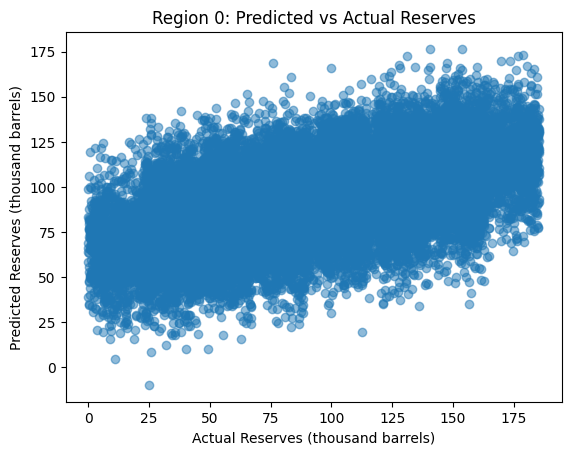

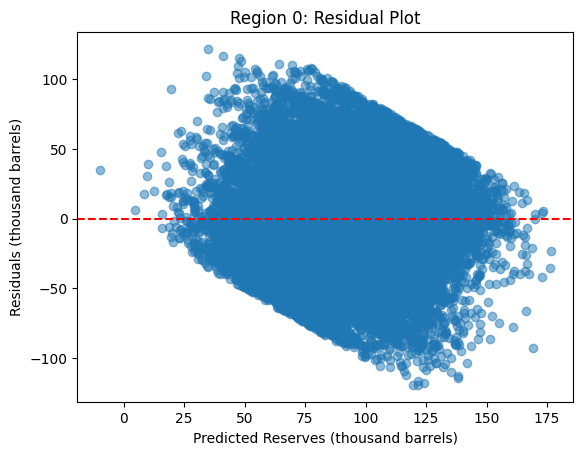

Region 1:
  RMSE: 0.89
  Mean Absolute Error (MAE): 0.72
  Adjusted R²: 1.00



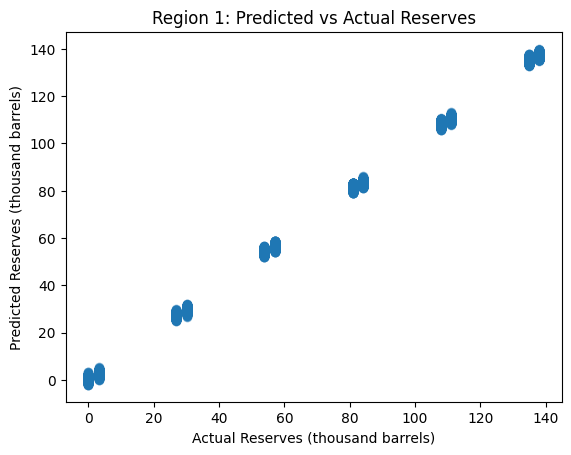

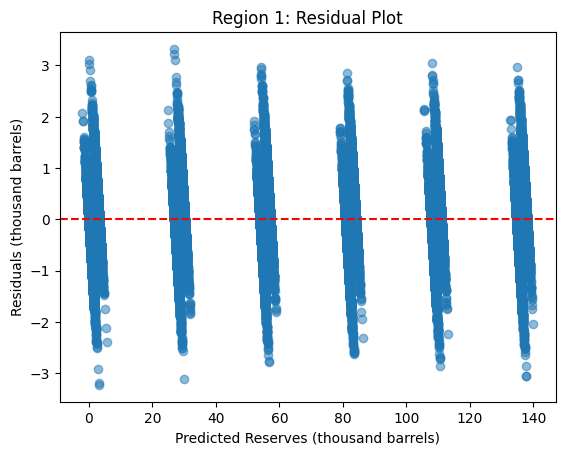

Region 2:
  RMSE: 40.15
  Mean Absolute Error (MAE): 32.90
  Adjusted R²: 0.20



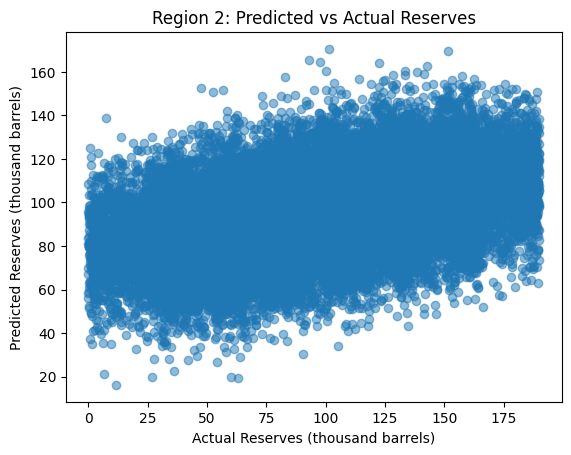

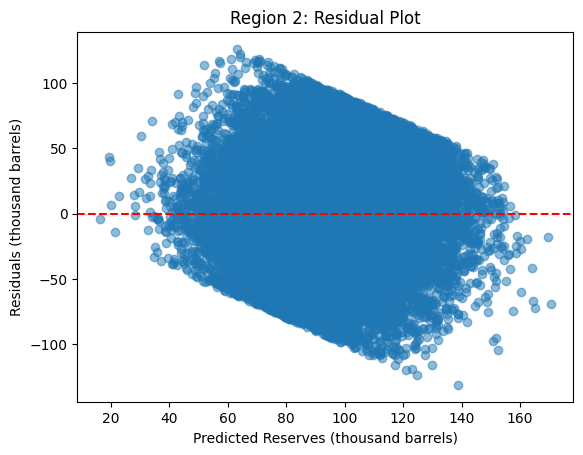

In [9]:
for i, (train, valid) in enumerate(zip([train_0, train_1, train_2], [valid_0, valid_1, valid_2])):
    # Separate features and target
    features_train = train.drop(columns=['id', 'product'])
    target_train = train['product']
    features_valid = valid.drop(columns=['id', 'product'])
    target_valid = valid['product']

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(features_train, target_train)
    models.append(model)

    # Make predictions and calculate metrics
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    mae = mean_absolute_error(target_valid, predictions)
    adjusted_r2 = 1 - (1 - model.score(features_valid, target_valid)) * ((len(target_valid) - 1) / (len(target_valid) - features_valid.shape[1] - 1))
    rmse_scores.append(rmse)

    print(f"Region {i}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Adjusted R²: {adjusted_r2:.2f}\n")

    # Scatter plot of predicted vs actual reserves
    plt.scatter(target_valid, predictions, alpha=0.5)
    plt.title(f"Region {i}: Predicted vs Actual Reserves")
    plt.xlabel("Actual Reserves (thousand barrels)")
    plt.ylabel("Predicted Reserves (thousand barrels)")
    plt.show()

    # Residual plot
    residuals = target_valid - predictions
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"Region {i}: Residual Plot")
    plt.xlabel("Predicted Reserves (thousand barrels)")
    plt.ylabel("Residuals (thousand barrels)")
    plt.show()



We used the bootstrapping technique to estimate the potential financial outcomes for each region. This involves generating 1,000 random samples with replacement from the predicted and actual reserve data, calculating profit for each sample, and summarizing the results. Key metrics, such as average profit, a 95% confidence interval, and the risk of financial losses, are computed for each region. This step provides a robust statistical understanding of the profitability and risk associated with each region, aiding in the selection of the most favorable location for oil well development.

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Added more visuals. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>
    
Good

</div>

In [ ]:
# Summarize findings
results = []

for i, (valid, model) in enumerate(zip([valid_0, valid_1, valid_2], models)):
    # Predicted reserves
    features_valid = valid.drop(columns=['id', 'product'])
    predictions = pd.Series(model.predict(features_valid), index=valid.index)
    
    # Actual reserves
    actual_reserves = valid['product']
    
    # Bootstrapping results
    avg_profit, confidence_interval, loss_risk = bootstrap_profit(predictions, actual_reserves)
    
    results.append({
        "Region": i,
        "Average Profit": avg_profit,
        "95% Confidence Interval": confidence_interval,
        "Risk of Losses (%)": loss_risk
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display findings
print(results_df)

# Recommend the best region
safe_regions = results_df[results_df["Risk of Losses (%)"] < 2.5]
if not safe_regions.empty:
    best_region = safe_regions.loc[safe_regions["Average Profit"].idxmax()]
    print(f"\nRecommended Region for Development: Region {int(best_region['Region'])}")
    print(f"Expected Average Profit: ${best_region['Average Profit']:,.2f}")
    print(f"95% Confidence Interval: {best_region['95% Confidence Interval']}")
    print(f"Risk of Losses: {best_region['Risk of Losses (%)']:.2f}%")
else:
    print("\nNo region meets the risk threshold (< 2.5%). Development is not recommended.")


After conducting a thorough analysis of the data from all three regions, it is evident that Region 1 offers the most promising opportunity for profitable oil well development. With an average profit estimated at approximately $24.15 million, this region stands out as the most lucrative option among the three. Moreover, the risk of incurring losses in Region 1 is 0.0%, which is well below the acceptable threshold of 2.5%, making it a highly secure choice for investment. The 95% confidence interval for Region 1’s profit ranges entirely in the positive zone, further confirming the consistency and reliability of its profitability. These results demonstrate that Region 1 not only meets but exceeds the business requirements for safe and profitable oil well development. Therefore, the recommendation is to proceed with the development of the 200 wells with the highest predicted reserves in Region 1. By prioritizing this region, OilyGiant can maximize its profits while minimizing financial risks, making it the most strategic choice for the company’s next phase of operations.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Great conclusion

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you for the feedback!
</div>